In [251]:
# Импорт необходимых модулей 
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Настройки для визуализации
# Если используется темная тема - лучше текст сделать белым
TEXT_COLOR = 'black'

matplotlib.rcParams['figure.figsize'] = (15, 10)
matplotlib.rcParams['text.color'] = 'black'
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['axes.labelcolor'] = TEXT_COLOR
matplotlib.rcParams['xtick.color'] = TEXT_COLOR
matplotlib.rcParams['ytick.color'] = TEXT_COLOR

# Зафиксируем состояние случайных чисел
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

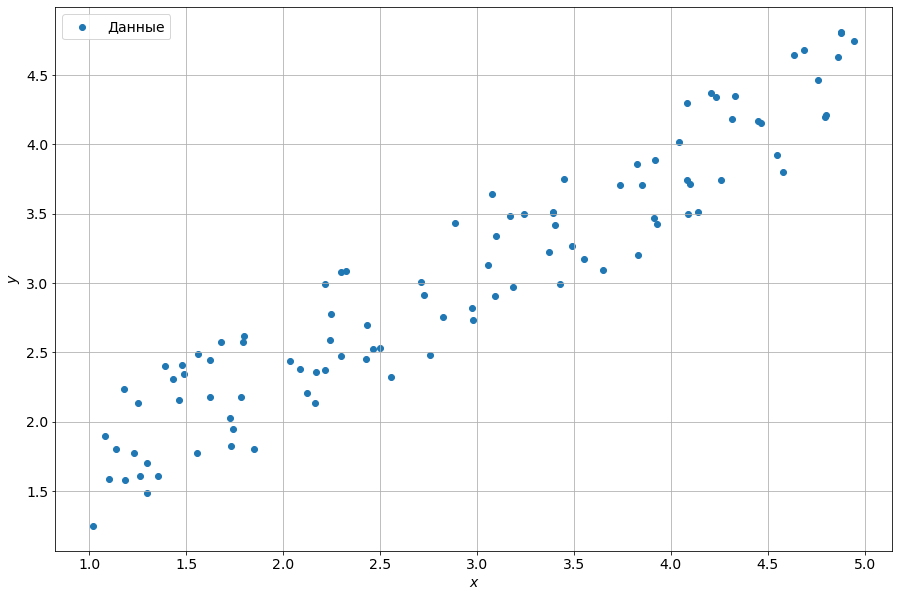

In [252]:
# Создание данных
# x - качество продукта [безразмерный показатель];
#y - цена продукта [у.е.].

n_points = 100

real_W = [1, 0.7]
X_data = 4*np.sort(np.random.rand(n_points, 1), axis=0)+1
noize = 1*(np.random.rand(n_points, 1)-0.5)
y_data_true = real_W[0] + real_W[1]*X_data
y_data_noized = y_data_true + noize
y_data = y_data_noized[:, 0]

X_render = np.linspace(X_data[:, 0].min(), X_data[:, 0].max(), 100)
y_render = real_W[0] + real_W[1]*X_render

plt.scatter(X_data, y_data_noized, label='Данные')
plt.ylabel('$y$')
plt.xlabel('$x$')
plt.grid()
plt.legend()

In [253]:
# Представление данных в табличном формате

pd.DataFrame({
    'quality': X_data[:,0],
    'price': y_data
}).head()

,quality,price
0,1.022088,1.246891
1,1.082338,1.894047
2,1.101677,1.585530
3,1.137554,1.804859
4,1.180909,2.234203


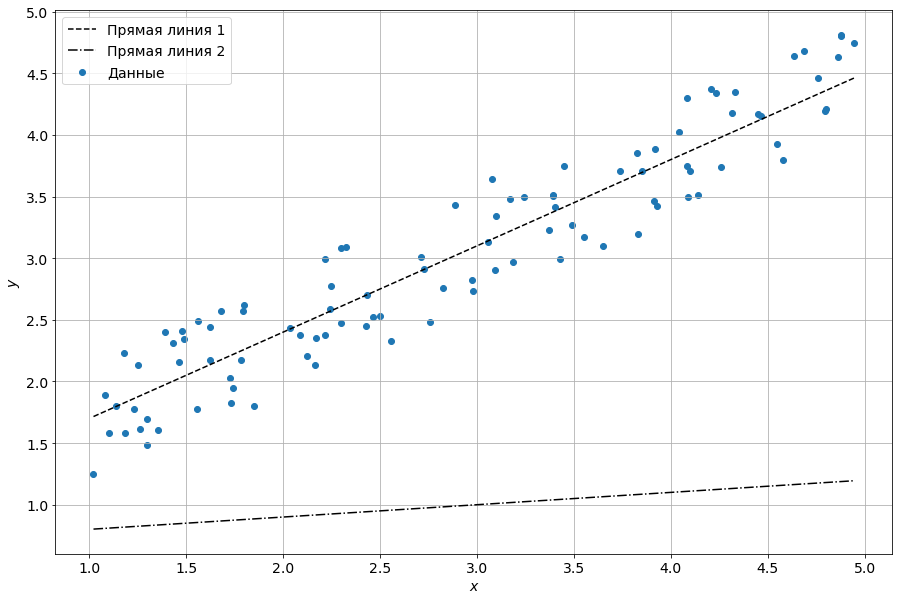

In [254]:
# Проводим две прямые через полученные данные

X_render = np.linspace(X_data[:, 0].min(), X_data[:, 0].max(), 100)
y1 = real_W[0] + real_W[1]*X_render
y2 = 0.7 + 0.1*X_render

plt.scatter(X_data, y_data_noized, label='Данные')
plt.plot(X_render, y1, 'k--', label='Прямая линия 1')
plt.plot(X_render, y2, 'k-.', label='Прямая линия 2')
plt.ylabel('$y$')
plt.xlabel('$x$')
plt.grid()
plt.legend()

In [255]:
print(X_data.shape)
print('-------')
print(y_data.shape)

(100, 1)
-------
(100,)


In [256]:
print(X_data[:3])
print('---------')
print(y_data[:3])

[[1.02208847]
 [1.08233798]
 [1.10167651]]
---------
[1.24689111 1.894047   1.58552954]


In [257]:
def predict_scalar_one(x, w0, w1):
    '''
    x - скалярное значение признака
    w0 - константное смещение
    w1 - вес признака
    '''
    y=w0+w1*x
    return y

In [258]:
# TEST

# В таких проверочных блоках будет проверяться корректность
#   написания вами кода, так что если в блоке выпадает ошибка - не пугайтесь,
#   просто, вероятно, код делает не совсем правильные вещи

# assert - ключевое слово Python
#   если ему передан True - он просто ничего не делает
#   если False - то он выдаст ошибку AssertionError, 
#                   что означает проверка не пройдена

x = 1
w0 = 2
w1 = 3

assert predict_scalar_one(x, w0, w1) == 5

In [259]:
data_index = 0

x = X_data[data_index, 0]
y_true = y_data[data_index]
# Зададим для примера следующие веса
w0 = 3
w1 = 0.2

y_pred_sc = predict_scalar_one(x, w0, w1)
print(f'y_pred_sc = predict_scalar({x}, {w0}, {w1}) = {y_pred_sc}')
print(f'y_true = {y_true}')


y_pred_sc = predict_scalar(1.0220884684944096, 3, 0.2) = 3.2044176936988817
y_true = 1.2468911136328207


In [260]:
# Функция предсказания для вектора признаков

def predict_one(X, W):
    '''
    X - вектор признаков [M]
    W - вектор весов [M+1]
    '''
    X=np.concatenate((np.ones((1),int),X))
    y = X@W
    return y

In [261]:
# TEST

# Запись в данных имеет, например, три [M = 3] признака
X = np.array([1, 2, 0])
# Веса модели [M+1]
W = np.array([3, 2, 1, 1])
y_pred = predict_one(X, W)

assert not isinstance(y_pred, (list, tuple, np.ndarray))
assert y_pred == 7

In [262]:
# Вектор наших случайно выбранных весов
selected_W = np.array([w0, w1])
X = X_data[data_index]
y_pred_one = predict_one(X, selected_W)
print(f'y_pred = predict_one({X}, {selected_W}) = {y_pred_one}')

y_pred = predict_one([1.02208847], [3.  0.2]) = 3.2044176936988817


In [263]:
assert y_pred_sc==y_pred_one

In [264]:
# напишем функцию предсказания для набора данных
def predict(X, W):
    '''
    X - 2D матрица признаков [N, M]
    W - вектор весов [M+1]
    '''
    X=np.concatenate((np.ones((X.shape[0],1),int),X),axis=1)
    y=X@W
    return y

In [265]:
# TEST
X = np.array([
    [1, 2, 3],
    [2, 3, 4],
    [3, 4, 5]
])
W = np.array([3, 2, 1, 2])
y_pred = predict(X, W)

assert np.all(y_pred == np.array([13, 18, 23]))
assert len(y_pred.shape) == 1
assert y_pred.shape[0] == 3

In [266]:
# достанем часть данных и сделаем предсказание в цикле векторной функцией и сравним с нашей матричной реализацией
data_len = 10

X = X_data[10:10+data_len]
y_true = y_data[10:10+data_len]
print(X)

[[1.29820257]
 [1.35397001]
 [1.39068846]
 [1.43156571]
 [1.46347624]
 [1.47837698]
 [1.48815294]
 [1.55797544]
 [1.5636969 ]
 [1.62397808]]


In [267]:
#   циклом по каждой записи
y_pred_sc = []
for x in X:
    y = predict_one(x, selected_W)
    y_pred_sc.append(y)

y_pred_sc = np.array(y_pred_sc)
y_pred_sc

array([3.25964051, 3.270794  , 3.27813769, 3.28631314, 3.29269525,
       3.2956754 , 3.29763059, 3.31159509, 3.31273938, 3.32479562])

In [268]:
y_pred = predict(X, selected_W)
selected_W

array([3. , 0.2])

In [269]:
print(f'ys_pred == ys_pred_sc -> {np.all(y_pred_sc==y_pred)}')

ys_pred == ys_pred_sc -> True


In [270]:
# Визуализация предсказаний
def plot_model(X, y_pred, y_true):
    plt.scatter(X, y_data, label='Данные')
    plt.plot(X, y_pred, 'k--', label='Предсказание модели')
    plt.ylabel('$Y$')
    plt.xlabel('$X$')
    plt.grid()
    plt.legend()
    plt.show()

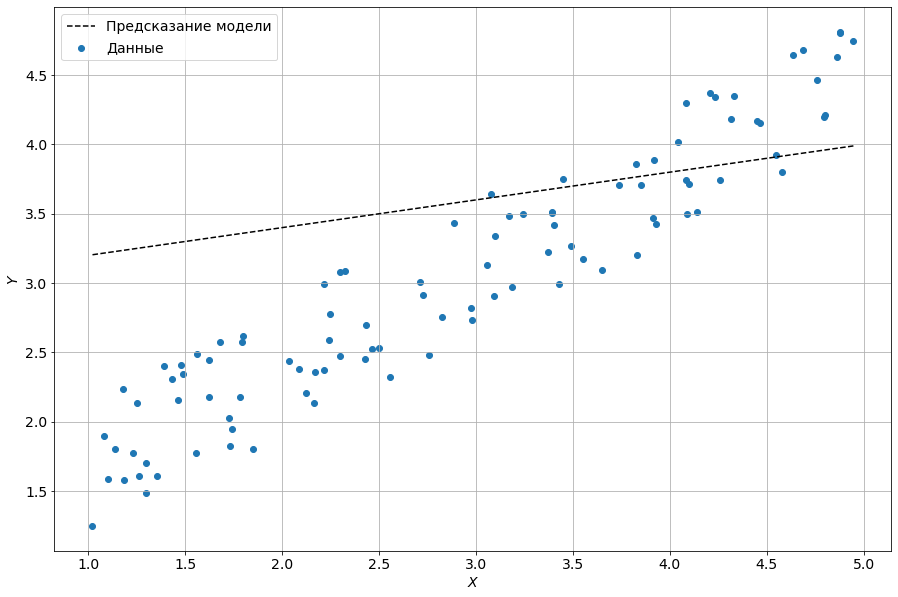

In [271]:
y_pred = predict(X_data, selected_W)
plot_model(X_data, y_pred, y_data)

In [272]:
# Функция вычисления RMSE
def rmse_score(y_true, y_pred):
    '''
    y_true - вектор истинных значений
    y_pred - вектор предсказанных значений
    '''
    rmse_value=np.sqrt((np.sum((y_true-y_pred)**2))/(len(y_true)))
    return rmse_value

def mae_score(y_true, y_pred):
    '''
    y_true - вектор истинных значений
    y_pred - вектор предсказанных значений
    '''
    mae_value=np.sum(np.abs(y_pred-y_true))/len(y_true)
    return mae_value

In [273]:
# TEST
y_true = np.array([0.5, 0.1, -0.4, 1.2])
y_pred = np.array([0.2, 0.0, -0.1, 3.1])

rmse_value = rmse_score(y_true, y_pred)
mae_value = mae_score(y_true, y_pred)

assert np.isclose(rmse_value, 0.974679)
assert np.isclose(mae_value, 0.65)

In [274]:
# Проверим ошибку на всем наборе данных
y_true = y_data
X = X_data
y_pred = predict(X, selected_W)

rmse_value = rmse_score(y_true, y_pred)
mae_value = mae_score(y_true, y_pred)

rmse_value, mae_value

(0.8822495430466523, 0.7395733955141036)

In [275]:
# функция для вычисления функции потерь

def loss_function(y_true, y_pred):
    '''
    y_true - вектор истинных значений
    y_pred - вектор предсказанных значений
    '''
    loss=(np.sum((y_pred-y_true)**2))/(2*(y_true.shape[0]))
    return loss

In [276]:
# TEST
y_true = np.array([0.5, 0.1, -0.4, 1.2])
y_pred = np.array([0.2, 0.0, -0.1, 3.1])

rmse_value = rmse_score(y_true, y_pred)
loss_value = loss_function(y_true, y_pred)

assert np.isclose(loss_value, rmse_value**2/2)

In [277]:
# Вычислим показатель loss на наших данных
y_true = y_data
X = X_data
y_pred = predict(X, selected_W)

loss_value = loss_function(y_true, y_pred)
loss_value

0.3891821281030134

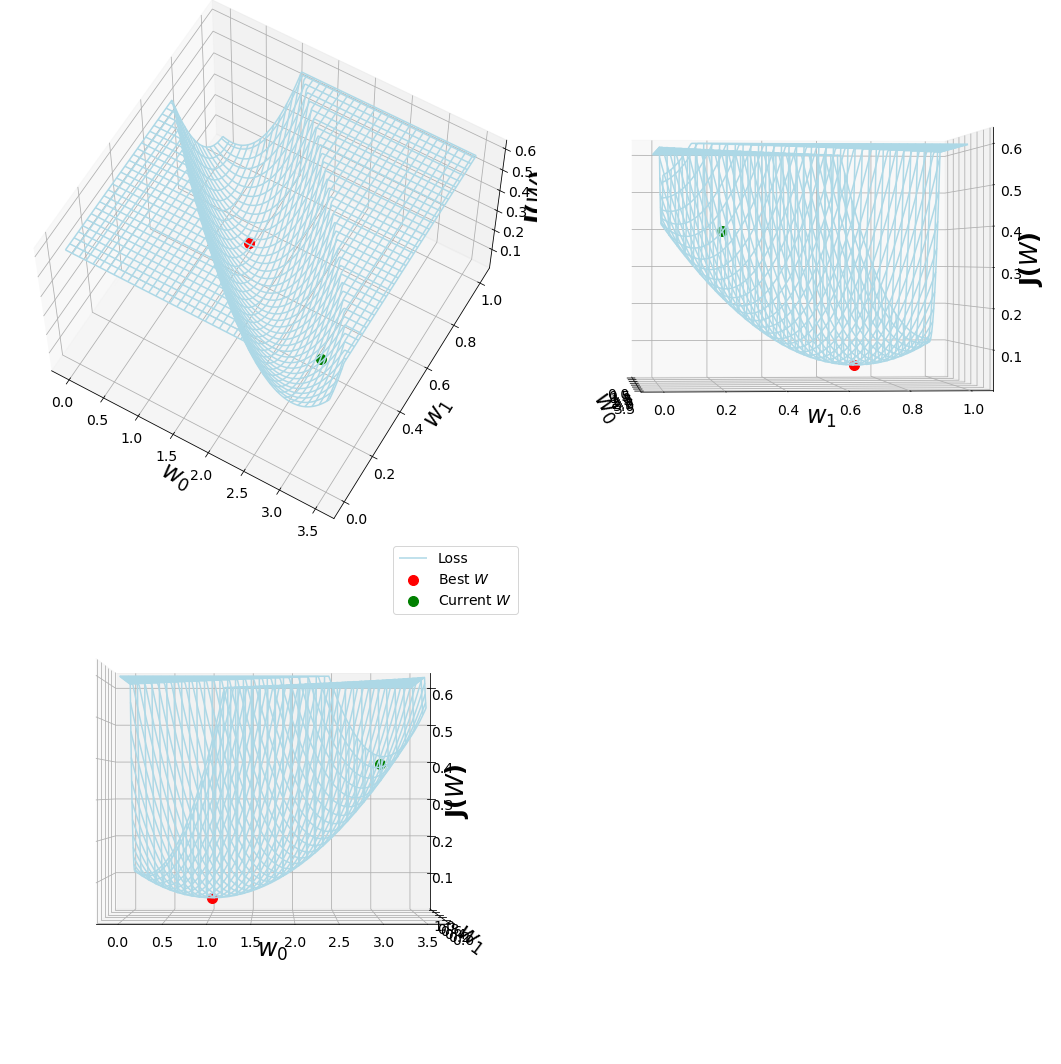

In [278]:
# Трехмерное графическое представление
# плоскость функции потерь

from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d

side_sz = 300

w0_vals = np.linspace(0, 3.5, side_sz)
w1_vals = np.linspace(0, 1, side_sz)

X = X_data
y_true = y_data

Z_MAX = 0.6

losses = np.ndarray((side_sz, side_sz))
for j in range(len(w1_vals)):
    w1 = w1_vals[j]
    for i in range(len(w0_vals)):
        w0 = w0_vals[i]
        
        render_W = np.array([w0, w1])
        y_pred = predict(X, render_W)

        loss = loss_function(y_true, y_pred)
        loss = np.clip(loss, 0, Z_MAX)
        losses[j, i] = loss

y_pred = predict(X, np.array(real_W))
real_point_loss = loss_function(y_true, y_pred)

y_pred = predict(X, selected_W)
current_point_loss = loss_function(y_true, y_pred)

fig = plt.figure(figsize=[15,15])
views = [
    # Subplot code, (around X, around Z)
    (221, (60, -60)),
    (222, (0, -5)),
    (223, (0, -90)),
]

ww0, ww1 = np.meshgrid(w0_vals, w1_vals)

for view in views:
    ax = fig.add_subplot(view[0], projection='3d')
    ax.plot_wireframe(
        ww0, 
        ww1, 
        losses, 
        color='lightblue', 
        rstride=8, 
        cstride=8, 
        label='Loss',
        cmap=cm.coolwarm,
    )

    ax.scatter(
        xs = [real_W[0]],
        ys = [real_W[1]],
        zs = [real_point_loss],
        color='r',
        label='Best $W$',
        s=100
    )

    ax.scatter(
        xs = [selected_W[0]],
        ys = [selected_W[1]],
        zs = [current_point_loss],
        color='g',
        label='Current $W$',
        s=100
    )

    ax.view_init(*view[1])
    
    font = {
        'color': 'black',
        'weight': 'bold',
        'size': 24,
    }
    ax.set_xlabel('$w_0$', fontdict=font)
    ax.set_ylabel('$w_1$', fontdict=font)
    ax.set_zlabel('J($W$)', fontdict=font)
    
    # ax.tick_params(axis='x', colors='black')
    # ax.tick_params(axis='y', colors='black')
    # ax.tick_params(axis='z', colors='black')

plt.legend()

plt.tight_layout()
plt.show()

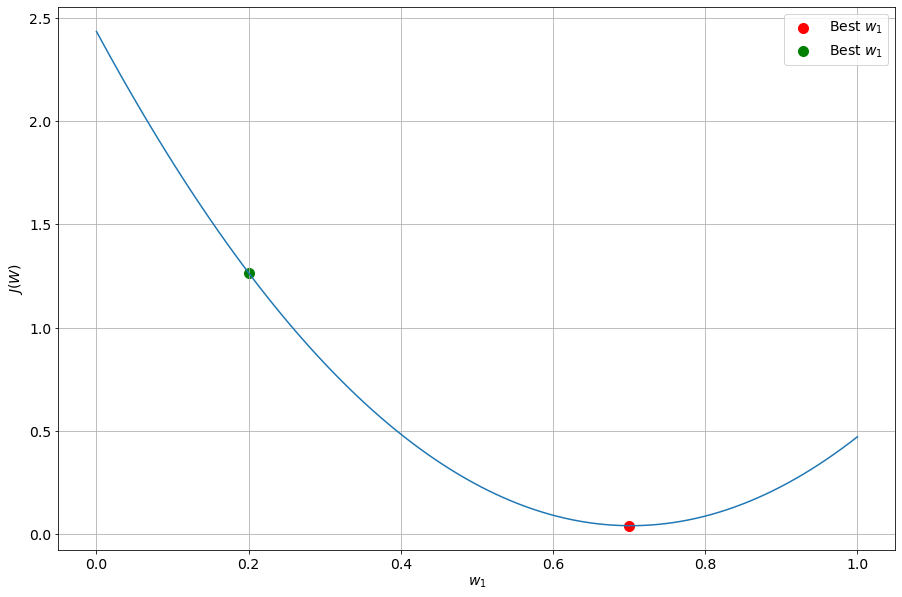

In [279]:
# 2D представление
w1 = np.linspace(0, 1, 100)
w0 = real_W[0]

X = X_data
y_true = y_data

losses = []

for w1_val in w1:
    render_W = np.array([w0, w1_val])
    y_pred = predict(X, render_W)

    loss = loss_function(y_true, y_pred)
    # loss = np.clip(loss, 0, Z_MAX)
    losses.append(loss)

losses = np.array(losses)

plt.plot(w1, losses)

# Render best point
y_pred = predict(X, np.array([w0, real_W[1]]))
best_loss = loss_function(y_true, y_pred)
plt.scatter([real_W[1]], [best_loss], color='r', s=100, label='Best $w_1$')

# Render selected point
y_pred = predict(X, np.array([w0, selected_W[1]]))
selected_loss = loss_function(y_true, y_pred)
plt.scatter([selected_W[1]], [selected_loss], color='g', s=100, label='Best $w_1$')

plt.grid(True)
plt.legend()

plt.xlabel('$w_1$')
plt.ylabel('$J(W)$')

plt.show()

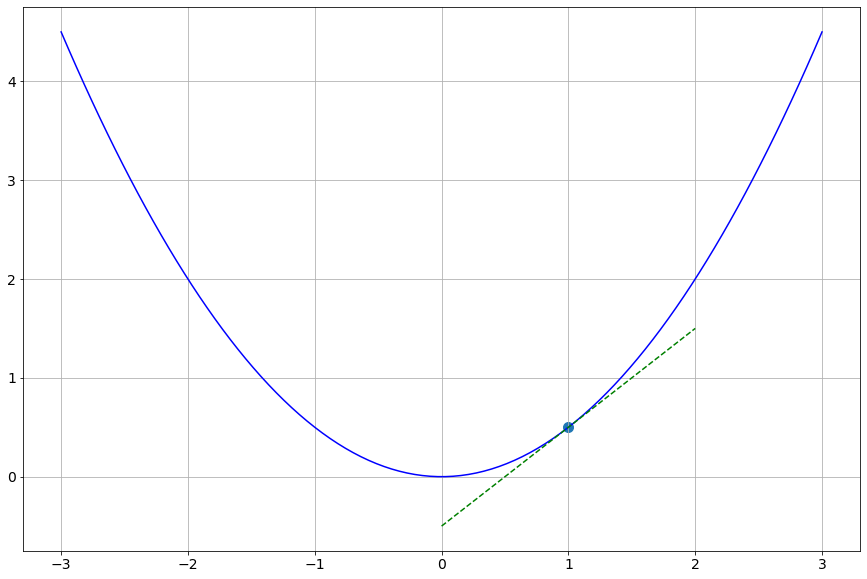

In [280]:
# Определение градиента
# Для примера возьмем функцию y=0.5x^2 и точку x=1:

x = np.linspace(-3, 3, 100)
y = 0.5*x**2

x_grad = np.linspace(0, 2, 100)
y_grad = x_grad-0.5

plt.plot(x, y, 'b')
plt.plot(x_grad, y_grad, 'g--')
plt.scatter([1], [0.5], s=100)
plt.grid(True)
plt.show()

In [281]:
# Вычисление производных по каждому признаку
def loss_function_deriv_w0(X, W, y_true):
    # TODO - код расчета производной для смещения
    X1=np.concatenate((np.ones((X.shape[0],1),int),X),axis=1)
    loss_deriv_w0=(np.sum(X1@W-y_true))/(y_true.shape[0])
    
    return loss_deriv_w0

def loss_function_deriv_w1(X, W, y_true):
    # TODO - код расчета производной для веса признака 1
    X1=np.concatenate((np.ones((X.shape[0],1),int),X),axis=1)
    loss_deriv_w1=(np.sum(((X1@W)-y_true)@X))/(y_true.shape[0])
    
    return loss_deriv_w1

In [282]:
# TEST
X = np.array([
    [1],
    [4],
])
W = np.array([1, 2])
y_true = np.array([1, 3])

dJ_w0 = loss_function_deriv_w0(X, W, y_true)
dJ_w1 = loss_function_deriv_w1(X, W, y_true)

assert dJ_w1 == 13
assert dJ_w0 == 4

In [283]:
# Посмотрим на данных
y_true = y_data
X = X_data

dJ_w0 = loss_function_deriv_w0(X, selected_W, y_true)
dJ_w1 = loss_function_deriv_w1(X, selected_W, y_true)
print(dJ_w1)
print('')
print(dJ_w0)

0.8902676036763332

0.5618067900885585


In [284]:
# Alpha - learning rate (lr)
lr = 0.01
n_iterations = 1000
# Создаем вектор весов с размерностью количества признаков + 1
new_W = np.zeros(X.shape[1]+1)
loss_history = []

for i_iter in range(n_iterations):
    dJ_w0 = loss_function_deriv_w0(X, new_W, y_true)
    dJ_w1 = loss_function_deriv_w1(X, new_W, y_true)
    w0_new=new_W[0]-lr*dJ_w0
    w1_new=new_W[1]-lr*dJ_w1
    new_W=[w0_new, w1_new]
    y_pred = predict(X, new_W)
    loss = loss_function(y_true, y_pred)
    loss_history.append(loss)

In [285]:
# TEST
assert np.all(np.isclose(new_W, np.array([0.76555, 0.77251])))

In [286]:
# Графическая визуализация
def show_loss(loss_history):
    plt.plot(loss_history)
    plt.grid()
    plt.title('Loss history')
    plt.xlabel('Iteration')
    plt.ylabel('$J(X)$')
    plt.show()

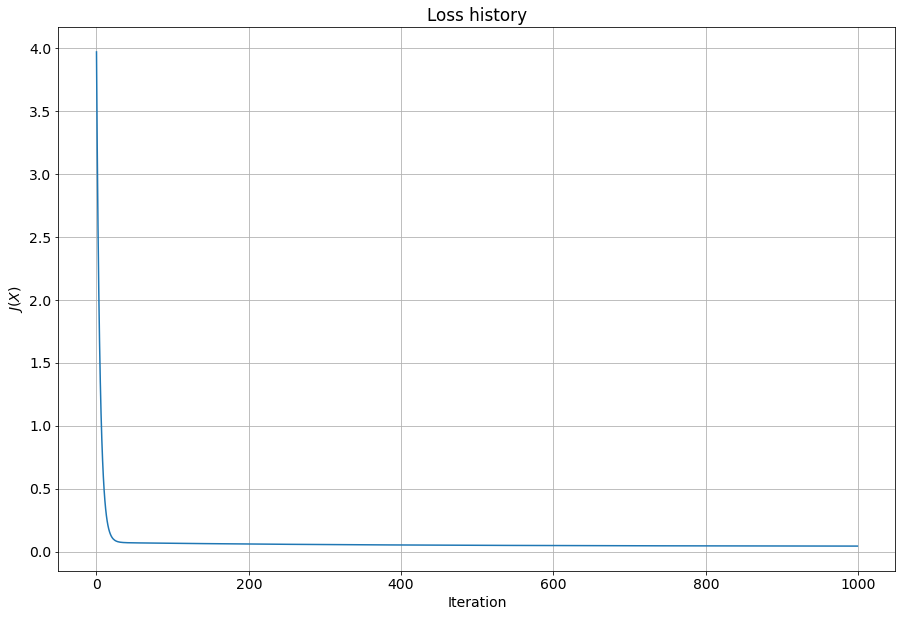

In [287]:
show_loss(loss_history)

In [288]:
new_W

[0.7655567074176559, 0.7725109234230839]

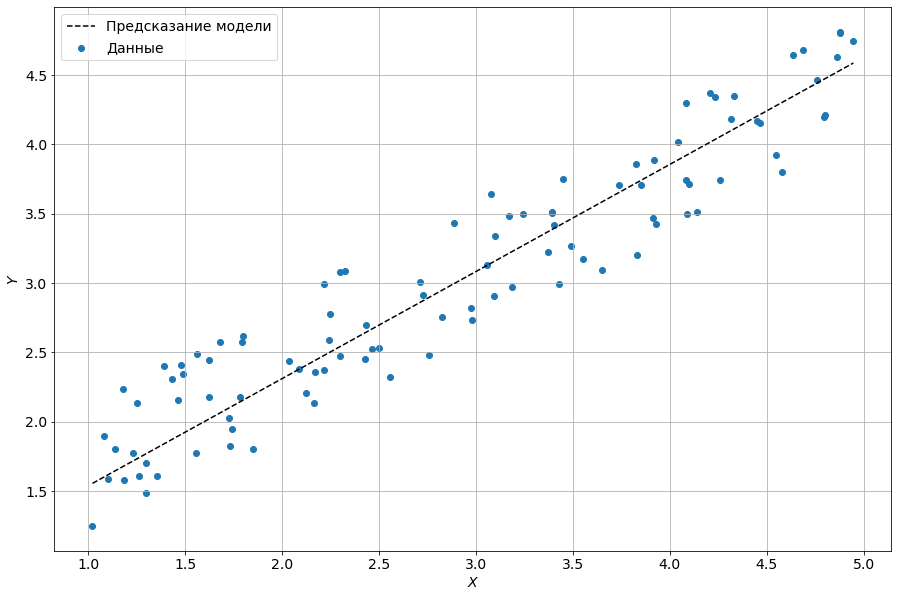

0.2983705528887494

In [289]:
y_pred = predict(X, new_W)
plot_model(X_data, y_pred, y_data)

rmse_value = rmse_score(y_true, y_pred)
rmse_value

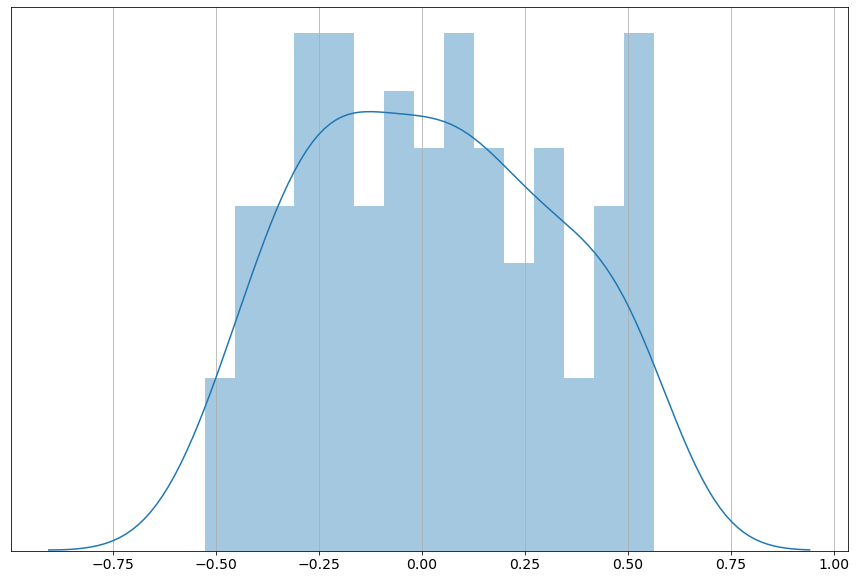

In [290]:
#  отображение распределения отклонений
y_residuals = y_true-y_pred

sns.distplot(y_residuals, bins=15)
plt.yticks([])
plt.grid(True)
plt.show()

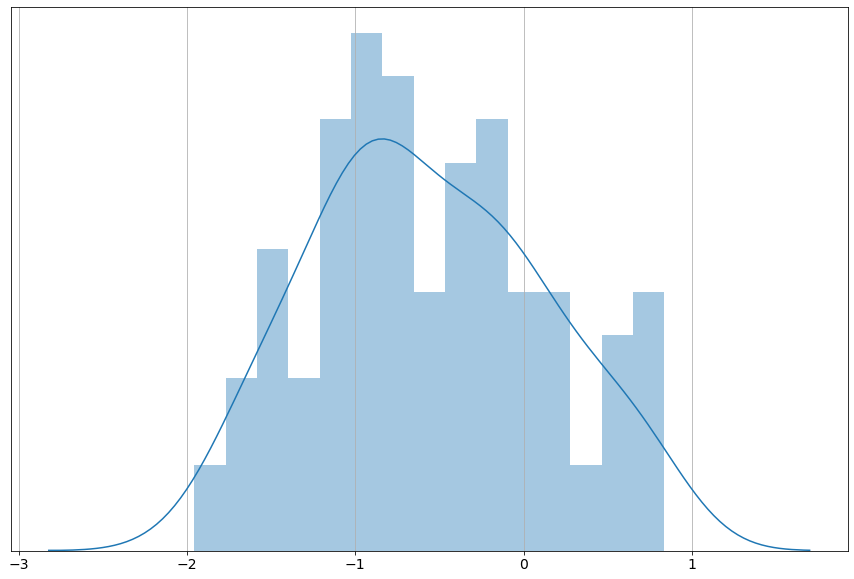

In [291]:
# проверим картину со случайными весами:
y_residuals = y_true-predict(X, selected_W)

sns.distplot(y_residuals, bins=15)
plt.yticks([])
plt.grid(True)
plt.show()

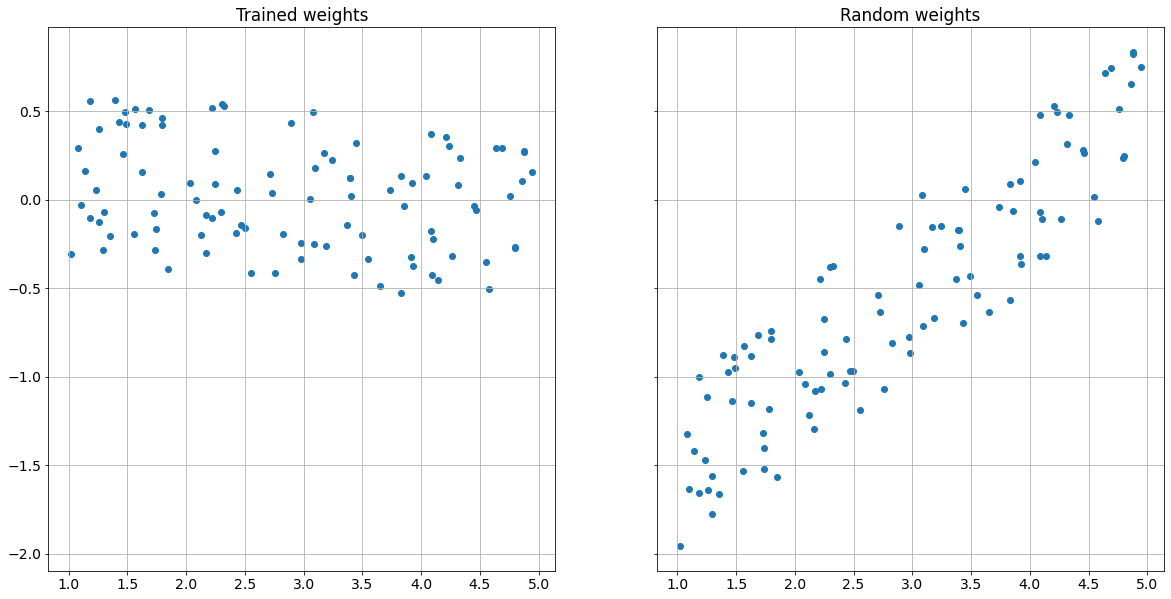

In [292]:
# точечный график отклонений:
_, ax = plt.subplots(1, 2, sharey=True, figsize=[20, 10])

y_pred = predict(X, new_W)
ax[0].scatter(X, y_true-y_pred)
ax[0].grid(True)
ax[0].set_title('Trained weights')

y_pred = predict(X, selected_W)
ax[1].scatter(X, y_true-y_pred)
ax[1].grid(True)
ax[1].set_title('Random weights')

plt.show()

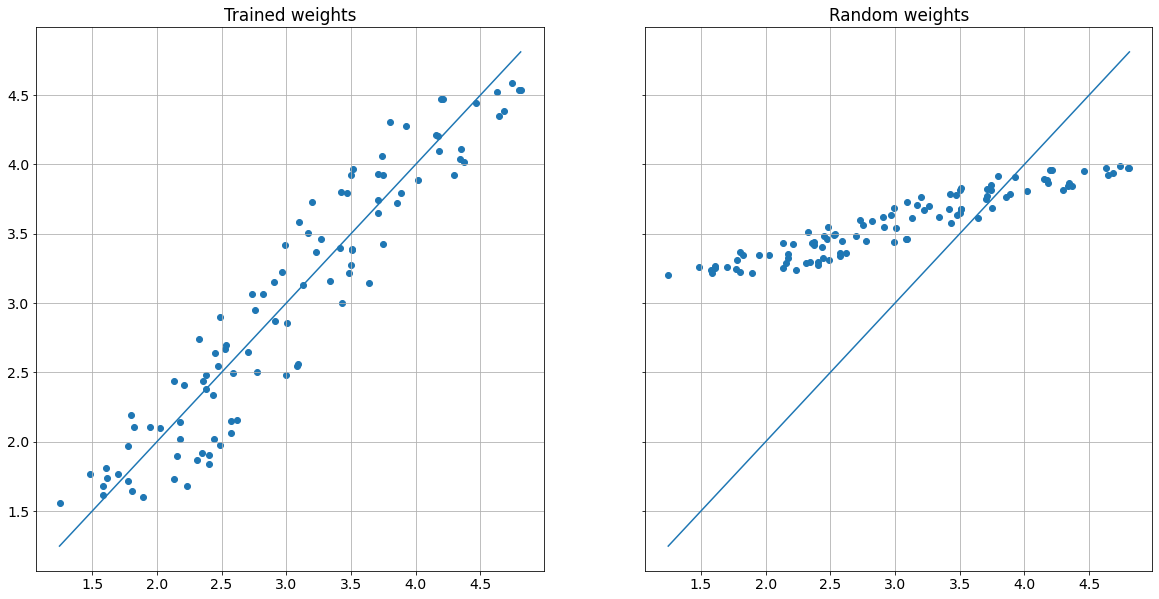

In [293]:
# график предсказанных значений от истинных
_, ax = plt.subplots(1, 2, sharey=True, figsize=[20, 10])

y_diag = np.sort(y_true)

y_pred = predict(X, new_W)
ax[0].plot(y_diag, y_diag)
ax[0].scatter(y_true, y_pred)
ax[0].grid(True)
ax[0].set_title('Trained weights')

y_pred = predict(X, selected_W)
ax[1].plot(y_diag, y_diag)
ax[1].scatter(y_true, y_pred)
ax[1].grid(True)
ax[1].set_title('Random weights')

plt.show()

In [294]:
# Векторная реализация
def loss_function_deriv(X, W, y_true):
    # TODO - код вектора производных (градиента)
    X1=np.concatenate((np.ones((X.shape[0],1),int),X),axis=1)
    loss_deriv=(np.sum(X1.T*(X1@W-y_true),axis=1))/len(y_true)
    return loss_deriv

In [295]:
def fit_model(lr, n_iter, X, y):
    new_W = np.zeros(X.shape[1]+1)
    loss_history = []
    print(f'Data shape: {X.shape}')
    print(f'Start weights: {new_W}')
    for i_iter in range(n_iter):
        dJ = loss_function_deriv(X,new_W,y)
        new_W = new_W - lr*dJ
        y_pred = predict(X, new_W)
        loss = loss_function(y, y_pred)
        loss_history.append(loss)
    print(f'Result weights: {new_W}')
    return new_W, loss_history


In [296]:
new_W, loss_history = fit_model(
    lr=0.01,
    n_iter=1000,
    X=X_data,
    y=y_data
)
# TEST
assert np.all(np.isclose(new_W, np.array([0.76555, 0.77251])))

Data shape: (100, 1)
Start weights: [0. 0.]
Result weights: [0.76555671 0.77251092]


Data shape: (100, 1)
Start weights: [0. 0.]
Result weights: [0.94188948 0.71941946]
Data shape: (100, 1)
Start weights: [0. 0.]
Result weights: [0.76555671 0.77251092]
Data shape: (100, 1)
Start weights: [0. 0.]
Result weights: [0.35950346 0.89474377]
Data shape: (100, 1)
Start weights: [0. 0.]
Result weights: [0.18946813 0.59753725]


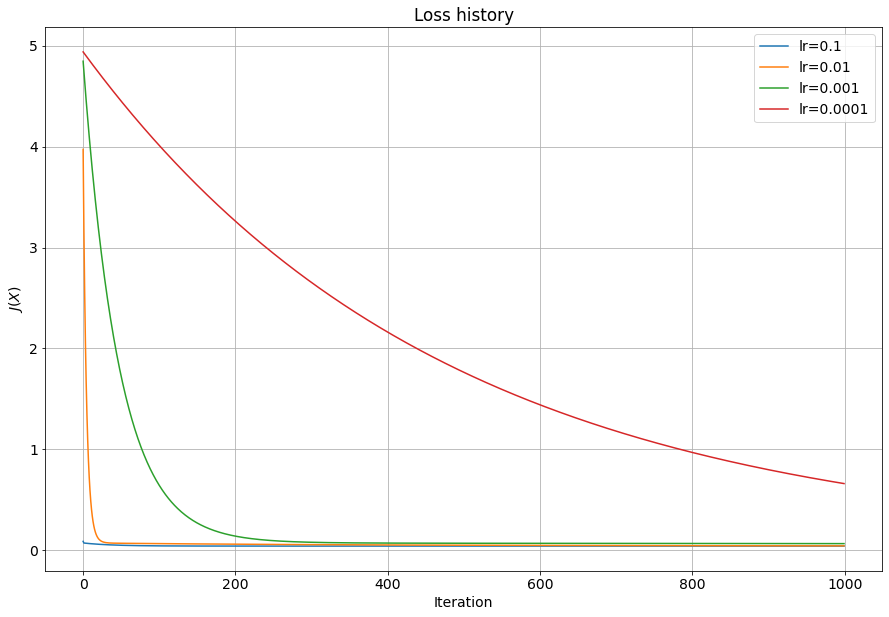

Data shape: (100, 1)
Start weights: [0. 0.]
Result weights: [0.94188948 0.71941946]
Data shape: (100, 1)
Start weights: [0. 0.]
Result weights: [0.76555671 0.77251092]
Data shape: (100, 1)
Start weights: [0. 0.]
Result weights: [0.35950346 0.89474377]
Data shape: (100, 1)
Start weights: [0. 0.]
Result weights: [0.18946813 0.59753725]


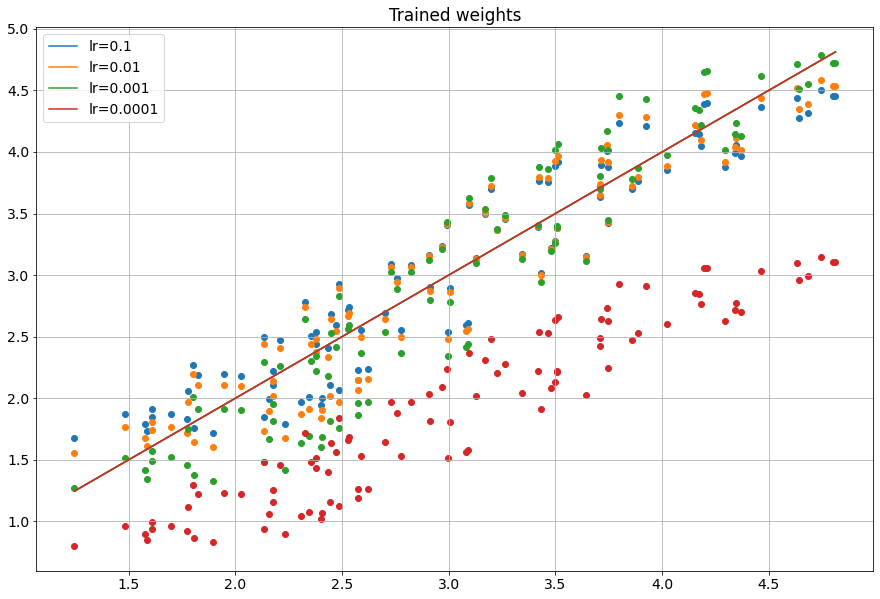

In [297]:
# TODO - обучите модели при разных коэффициентах обучения 
#           и отобразите графики истории

for lr_mass in np.array([0.1,0.01,0.001,0.0001]):
    new_W, loss_history = fit_model(
        lr=lr_mass,
        n_iter=1000,
        X=X_data,
        y=y_data
    )
    plt.plot(loss_history)
       
plt.legend(['lr=0.1','lr=0.01','lr=0.001','lr=0.0001'])
plt.grid()
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('$J(X)$')
plt.show()

for lr_mass in np.array([0.1,0.01,0.001,0.0001]):
    new_W, loss_history = fit_model(
        lr=lr_mass,
        n_iter=1000,
        X=X_data,
        y=y_data
    )
    
    y_diag = np.sort(y_true)
    y_pred = predict(X, new_W)
    plt.plot(y_diag, y_diag)
    plt.scatter(y_true, y_pred)
        
plt.legend(['lr=0.1','lr=0.01','lr=0.001','lr=0.0001'])
plt.title('Trained weights')
plt.grid()

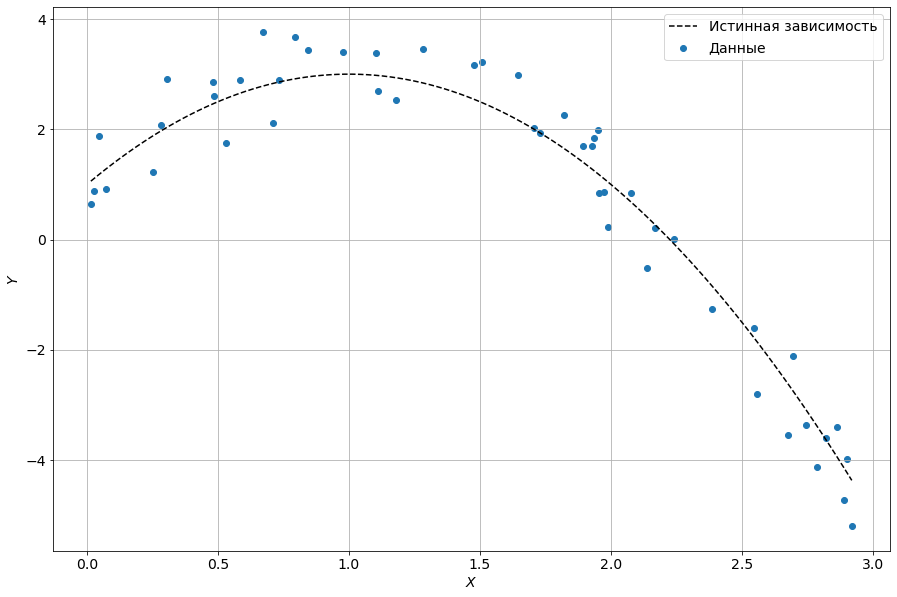

In [298]:
# Полиномиальная регрессия
n_points = 50

real_W = [1, 4, -2]
X_data = 3*np.sort(np.random.rand(n_points, 1), axis=0)
noize = 2*(np.random.rand(n_points, 1)-0.5)
y_data_true = real_W[0] + real_W[1]*X_data + real_W[2]*X_data**2
y_data_noized = y_data_true + noize
y_data = y_data_noized[:, 0]

X_render = np.linspace(X_data.min(), X_data.max(), 100)
y_render = real_W[0] + real_W[1]*X_render + real_W[2]*X_render**2

plt.scatter(X_data, y_data_noized, label='Данные')
plt.plot(X_render, y_render, 'k--', label='Истинная зависимость')
plt.ylabel('$Y$')
plt.xlabel('$X$')
plt.grid()
plt.legend()

In [299]:
def generate_polynomial_features(X, degree):
    # TODO - код генерации полиномиальных признаков
    #           из вектора X
    X_poly=X
    for i in range(degree-1):
        X_poly=np.concatenate((X_poly,X**(i+2)),axis=1)
    return X_poly

In [300]:
# TEST
X = np.array([
    [1],
    [2],
    [3],
])

X_poly = generate_polynomial_features(X, degree=2)
assert np.all(X_poly == np.array([[1, 1], [2, 4], [3, 9]]))

In [301]:
X_poly = generate_polynomial_features(X_data, degree=2)

In [302]:
# Задаем примерные начальные веса
selected_W = np.array([1.1, 1.2, 1.3])
X = generate_polynomial_features(X_data, degree=2)
y_true = y_data

# Проверяем предикт
y_pred = predict(X, selected_W)

y_pred.shape, y_pred.shape[0] == X_data.shape[0]

((50,), True)

In [303]:
# Проверяем показатель метрики
rmse_value = rmse_score(y_true, y_pred)

rmse_value

9.54122425719995

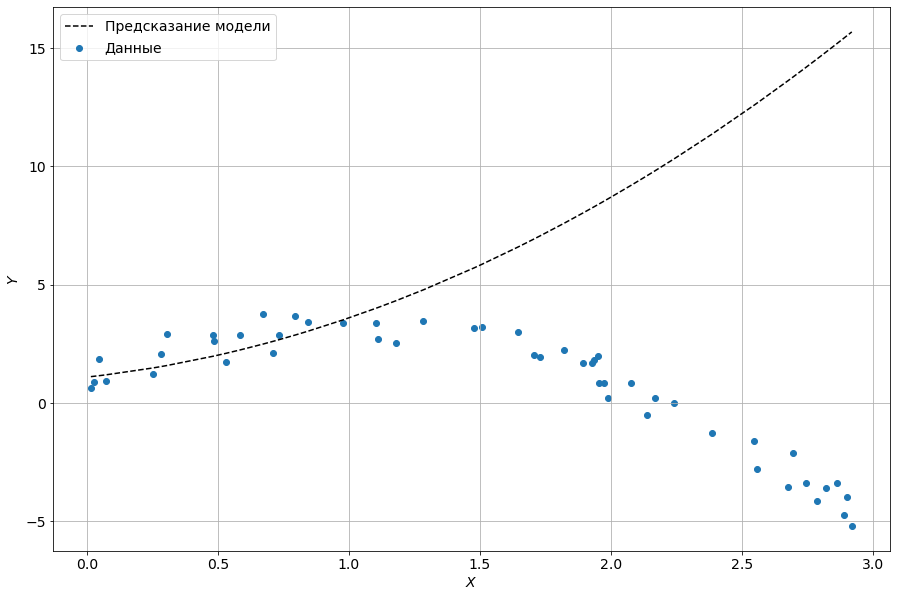

In [304]:
plot_model(X_data, y_pred, y_data)

Data shape: (50, 2)
Start weights: [0. 0. 0.]
Result weights: [ 1.79060588  3.02760564 -1.75710417]


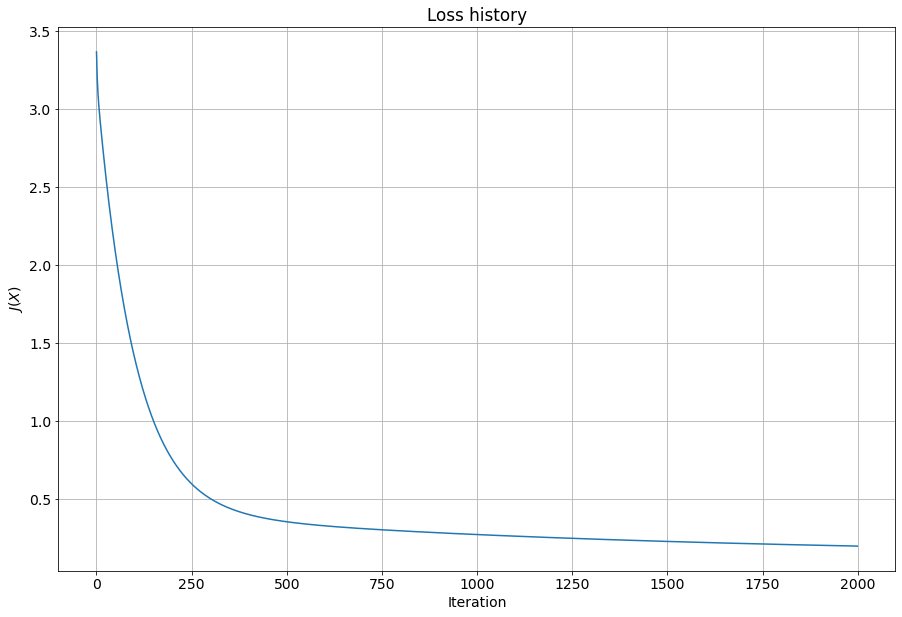

In [305]:
new_W, loss_history = fit_model(
    lr=0.01,
    n_iter=2000,
    X=X,
    y=y_data
)

show_loss(loss_history)

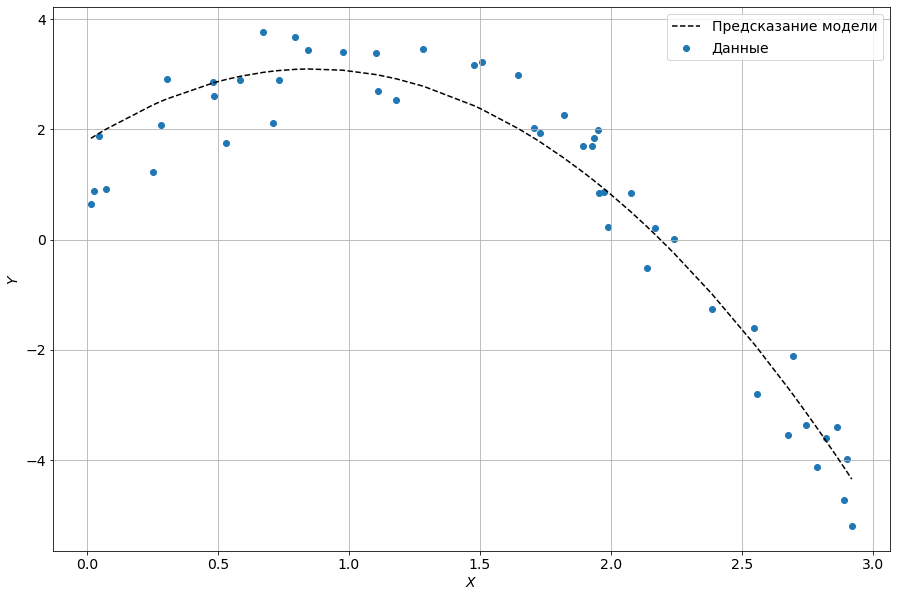

0.6299511551354807

In [306]:
y_pred = predict(X, new_W)
plot_model(X_data, y_pred, y_true)
rmse_score(y_true, y_pred)

Data shape: (50, 1)
Start weights: [0. 0.]
Result weights: [ 3.9101159  -2.04843436]


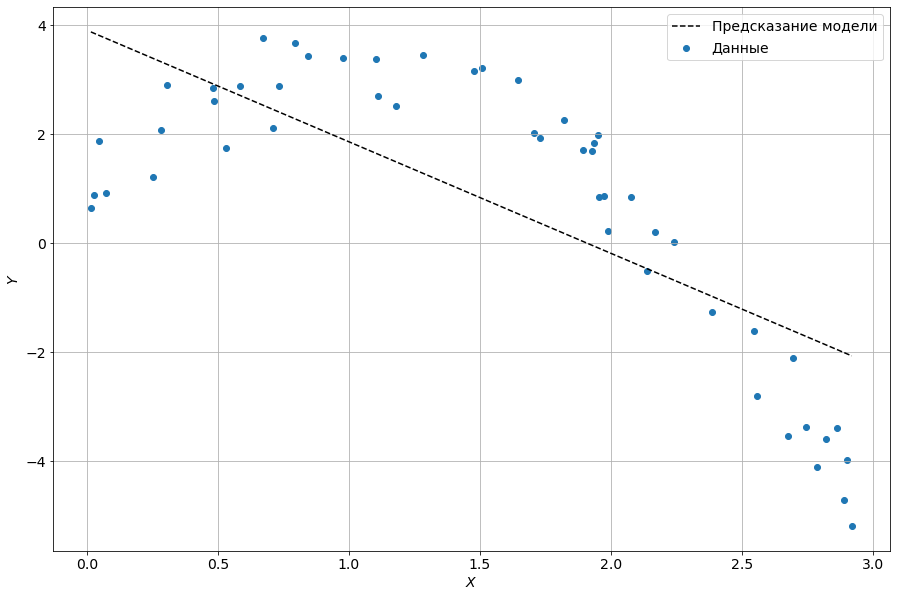

In [307]:
# Underfit (high bias)
DEGREE=1
X = generate_polynomial_features(X_data, degree=DEGREE)
y_true = y_data

new_W, loss_history = fit_model(
    lr=0.01,
    n_iter=2000,
    X=X,
    y=y_data
)

y_pred = predict(X, new_W)
plot_model(X_data, y_pred, y_data)

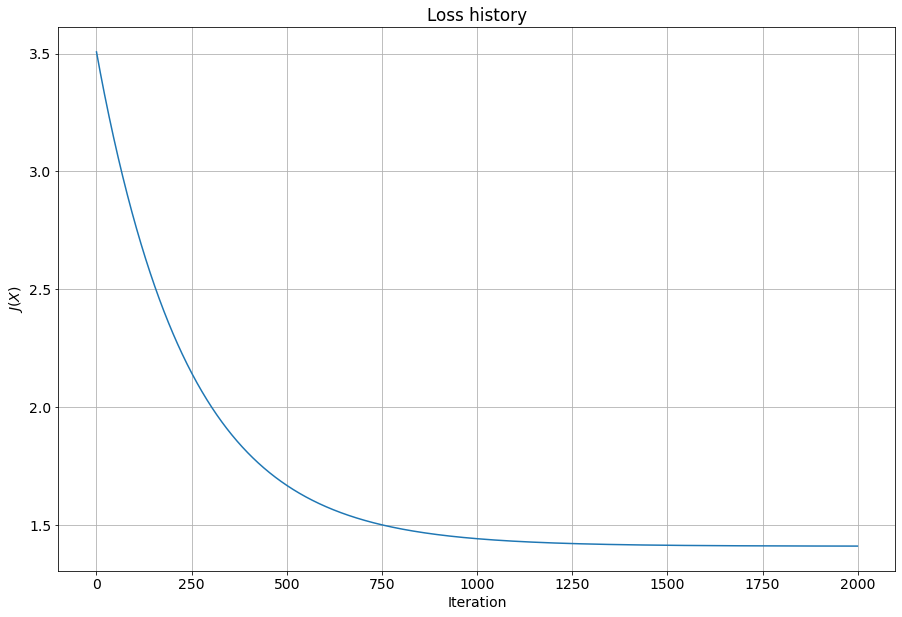

In [308]:
show_loss(loss_history)

In [309]:
# R2 метрика (коэффициент детерминации)
def r2_score(y_true, y_pred):
    # TODO - код расчета R-squared
    y_sr=np.sum(y_true)/len(y_true)
    ss_tot=np.sum((y_true-y_sr)**2)
    ss_res=np.sum((y_true-y_pred)**2)
    r2_value=1-(ss_res/ss_tot)
    return r2_value

In [310]:
# TEST
y_true = np.array([0.5, 0.1, -0.4, 1.2])
y_pred = np.array([0.2, 0.0, -0.1, 3.1])

r2_value = r2_score(y_true, y_pred)

assert np.isclose(r2_value, -1.773722)

In [311]:
y_true = y_data
y_pred = predict(X, new_W)
r2_value = r2_score(y_true, y_pred)

r2_value, r2_value > 0

(0.5634150525920686, True)

Data shape: (50, 2)
Start weights: [0. 0. 0.]
Result weights: [ 1.51020269  3.512052   -1.90540432]
r2_value=0.5634150525920686


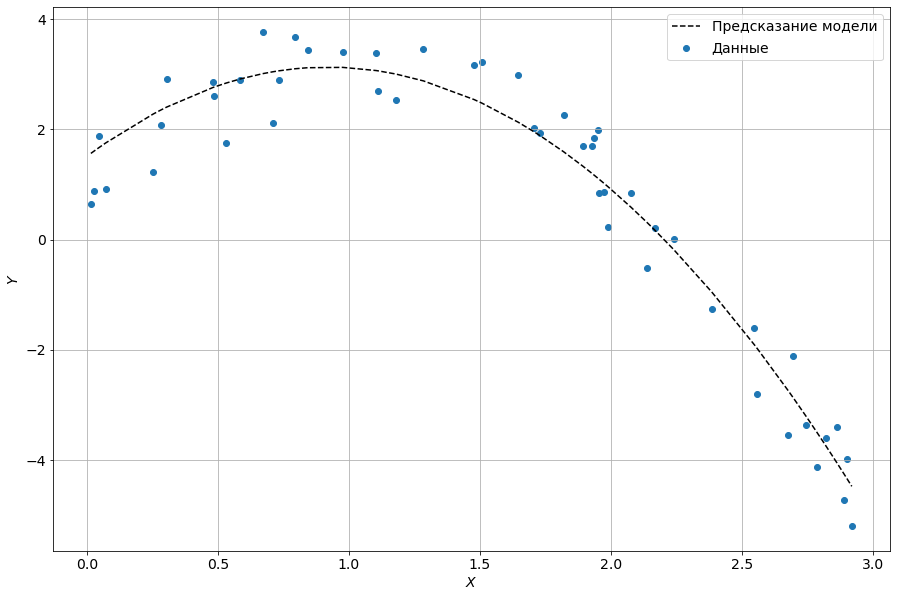

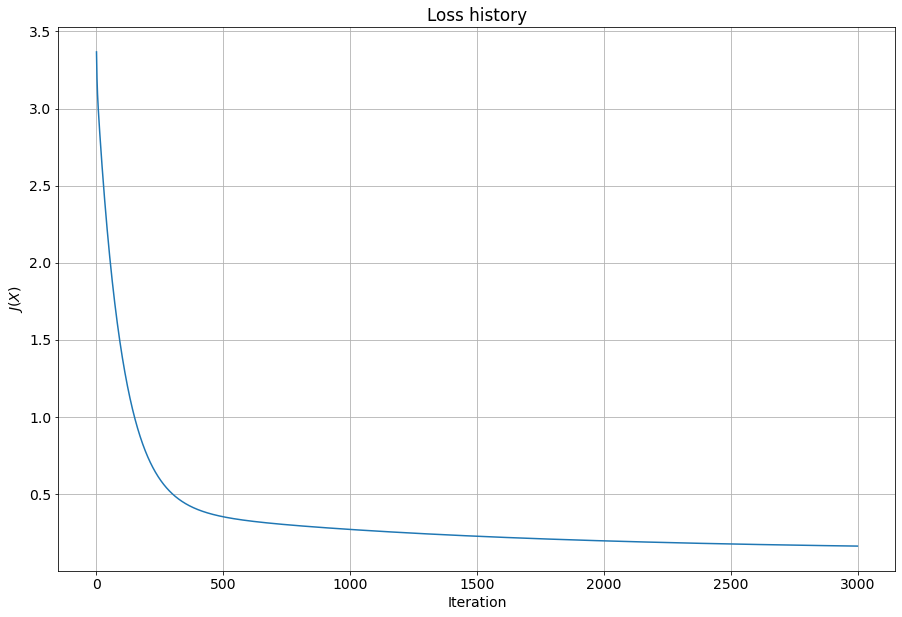

In [312]:
# TODO - обучите модель при признаках второго порядка и оцените R2

DEGREE=2
X = generate_polynomial_features(X_data, degree=DEGREE)
y_true = y_data

new_W, loss_history = fit_model(
    lr=0.01,
    n_iter=3000,
    X=X,
    y=y_data
)
r2_value = r2_score(y_true, y_pred)
print(f'r2_value={r2_value}')
y_pred = predict(X, new_W)
plot_model(X_data, y_pred, y_data)
show_loss(loss_history)

<ipython-input-313-9893c599bebb>:8: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef_, _residues, rank_, singular_ = np.linalg.lstsq(X, y)


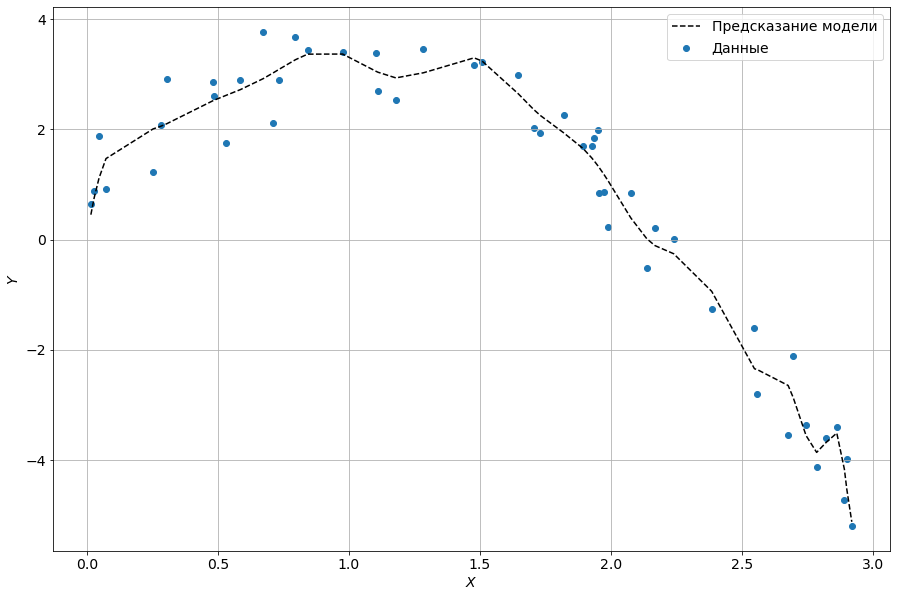

(0.47155461938132254, 0.9656174232244344)

In [313]:
# Overfit (high variance)

DEGREE=25
X = generate_polynomial_features(X_data, degree=DEGREE)
y = y_data

def fit_model_least_square(X, y):
    coef_, _residues, rank_, singular_ = np.linalg.lstsq(X, y)
    coef_ = np.insert(coef_, 0, 0)
    new_W = np.array(coef_)

    return new_W

new_W = fit_model_least_square(X, y)

y_pred = predict(X, new_W)
plot_model(X_data, y_pred, y_data)
rmse_score(y_true, y_pred), r2_score(y_true, y_pred)

In [314]:
# Определение избыточности модели
DATA_COUNT=X_data.shape[0]
# np.random.permutation() - функция перемешивания данных 
#   в переданном массиве
data_indexes=np.random.permutation(range(DATA_COUNT))

# 70% данных уходит на обучение
TRAIN_COUNT=int(DATA_COUNT*0.7)
train_indexes=data_indexes[:TRAIN_COUNT]
test_indexes=data_indexes[TRAIN_COUNT:]

X_train = X_data[train_indexes]
y_train = y_data[train_indexes]
X_test = X_data[test_indexes]
y_test = y_data[test_indexes]

X_train = generate_polynomial_features(X_train, degree=DEGREE)
X_test = generate_polynomial_features(X_test, degree=DEGREE)

In [315]:
new_W = fit_model_least_square(X_train, y_train)

y_pred = predict(X_test, new_W)
test_mse = rmse_score(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

y_pred = predict(X_train, new_W)
train_mse = rmse_score(y_train, y_pred)
train_r2 = r2_score(y_train, y_pred)

print(f'Train MSE: {train_mse} / R2: {train_r2}')
print(f'Test MSE: {test_mse} / R2: {test_r2}')

Train MSE: 0.3904511447742049 / R2: 0.9673458912095995
Test MSE: 4.140712916867529 / R2: -0.8583476460138741


<ipython-input-313-9893c599bebb>:8: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef_, _residues, rank_, singular_ = np.linalg.lstsq(X, y)


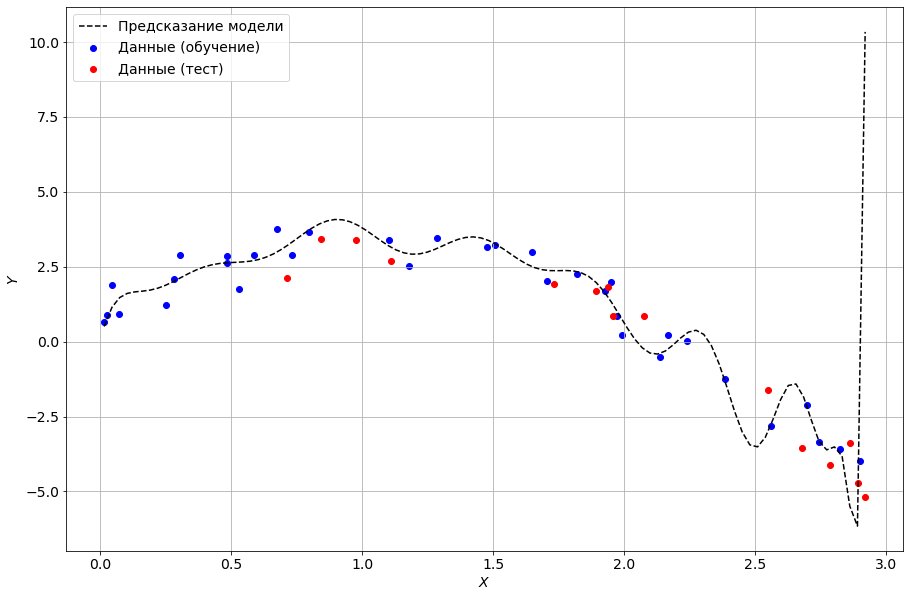

In [316]:
X_min = X_data[:,0].min()
X_max = X_data[:,0].max()

X_render = np.linspace(X_min, X_max, 100).reshape(-1, 1)
# Добавим генерацию полиномиальных признаков
X_render = generate_polynomial_features(X_render, DEGREE)
y_render = predict(X_render, new_W)

plt.scatter(X_train[:,0], y_train, color='blue', label='Данные (обучение)')
plt.scatter(X_test[:,0], y_test, color='red', label='Данные (тест)')
plt.plot(X_render[:,0], y_render, 'k--', label='Предсказание модели')
plt.ylabel('$Y$')
plt.xlabel('$X$')
plt.grid()
plt.legend()
plt.show()

In [317]:
# Стандартизация/нормализация значений признаков

DEGREE=7
X_poly = generate_polynomial_features(X_data, degree=DEGREE)

In [318]:
X = X_poly
y_true = y_data

new_W, loss_history = fit_model(
    lr=0.01,
    n_iter=2000,
    X=X,
    y=y_true
)

Data shape: (50, 7)
Start weights: [0. 0. 0. 0. 0. 0. 0. 0.]


<ipython-input-275-62dd9bf4de59>:8: RuntimeWarning: overflow encountered in square
  loss=(np.sum((y_pred-y_true)**2))/(2*(y_true.shape[0]))
C:\Users\ksyus\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-295-7f9fd5e8ea07>:8: RuntimeWarning: invalid value encountered in subtract
  new_W = new_W - lr*dJ


Result weights: [nan nan nan nan nan nan nan nan]


In [319]:
# Большая разница в порядках между первым и последним признаком,как следствие - градиент расходится
start_W = np.zeros(DEGREE+1)
dJ = loss_function_deriv(X, start_W, y_true)
print(dJ)

[-7.51507038e-01  5.89341507e-01  3.94164214e+00  1.37566793e+01
  4.23857078e+01  1.24938015e+02  3.61130019e+02  1.03388272e+03]


Data shape: (50, 7)
Start weights: [0. 0. 0. 0. 0. 0. 0. 0.]
Result weights: [ 0.02601008  0.02274571  0.02450783  0.02750695  0.02856245  0.02222846
  0.00341711 -0.00859487]


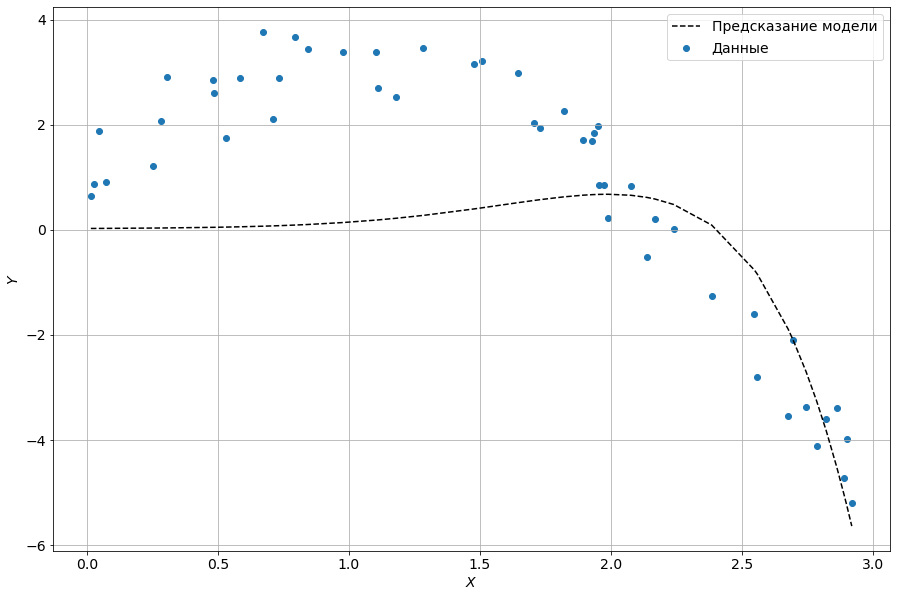

In [320]:
# Уменьшение коэффициента обучения, как средство от расходящегося градиента
new_W, loss_history = fit_model(
    lr=1e-6,
    n_iter=20000,
    X=X,
    y=y_true
)
y_pred = predict(X, new_W)
plot_model(X_data, y_pred, y_data)

In [321]:
# Нормализация
def standardize_features_scale(X):
    # TODO - код для стандартизации
    X_scaled=(X-np.mean(X,axis=0))/(np.std(X,axis=0))
    return X_scaled

In [322]:
# TEST
X = np.arange(2, 10).reshape(4, 2)

X_scaled = standardize_features_scale(X)

# Cтандартизированные данные должны иметь нулевое среднее и единичное стандартное отклонение
assert np.all(np.isclose(X_scaled.mean(axis=0), 0))
assert np.all(np.isclose(X_scaled.std(axis=0), 1))

assert np.all(
    np.isclose(
        X_scaled, 
        np.array([[-1.34164079, -1.34164079],
                  [-0.4472136 , -0.4472136 ],
                  [ 0.4472136 ,  0.4472136 ],
                  [ 1.34164079,  1.34164079]])
    )
)

In [323]:
X_poly_scaled = standardize_features_scale(X_poly)
y_true = y_data
start_W = np.zeros(DEGREE+1)

dJ = loss_function_deriv(X_poly_scaled, start_W, y_true)
print(dJ)

[-0.75150704  1.90912685  2.25280109  2.37927616  2.41370551  2.40779181
  2.38494306  2.35561417]


Data shape: (50, 7)
Start weights: [0. 0. 0. 0. 0. 0. 0. 0.]
Result weights: [ 0.75150704  0.90806429 -0.63261696 -0.93543922 -0.81471008 -0.55864704
 -0.2751934  -0.0042838 ]


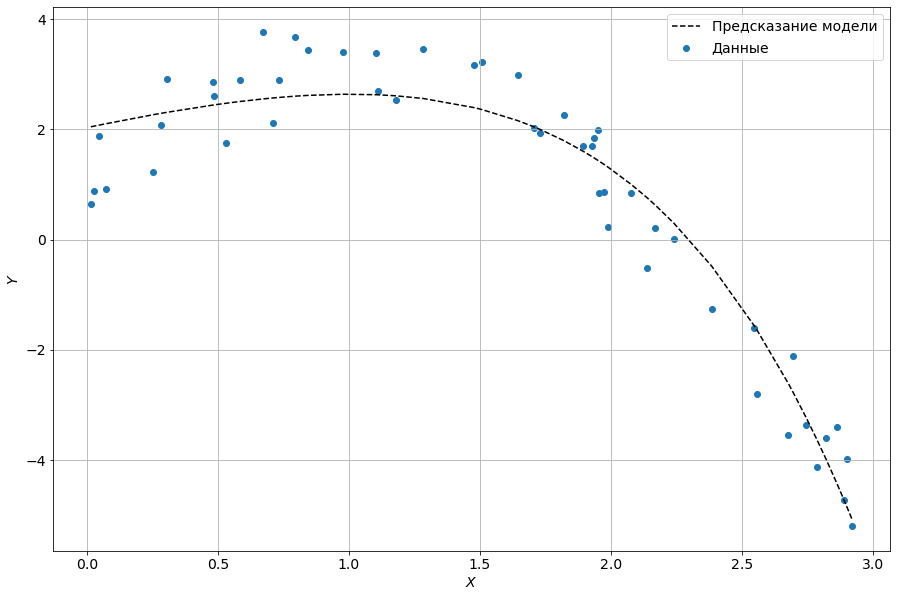

0.9239837705848348

In [324]:
new_W, loss_history = fit_model(
    lr=0.01,
    n_iter=2000,
    X=X_poly_scaled,
    y=y_true
)
y_pred = predict(X_poly_scaled, new_W)
plot_model(X_data, y_pred, y_data)
r2_score(y_true, y_pred)

In [325]:
def minmax_feature_scale(X):
    # TODO - код масштабирования по принципу minmax
    X_scaled=(X-np.min(X,axis=0))/(np.max(X,axis=0)-np.min(X,axis=0))
    return X_scaled

In [326]:
# TEST
X = np.arange(2, 10).reshape(4, 2)

X_scaled = minmax_feature_scale(X)

assert np.all(
    np.isclose(
        X_scaled, 
        np.array([[0.        , 0.        ],
                  [0.33333333, 0.33333333],
                  [0.66666667, 0.66666667],
                  [1.        , 1.        ]])
    )
)

Data shape: (50, 7)
Start weights: [0. 0. 0. 0. 0. 0. 0. 0.]
Result weights: [ 2.51688465  0.45641532 -0.87639319 -1.35418292 -1.49581372 -1.50144132
 -1.45109332 -1.37928094]


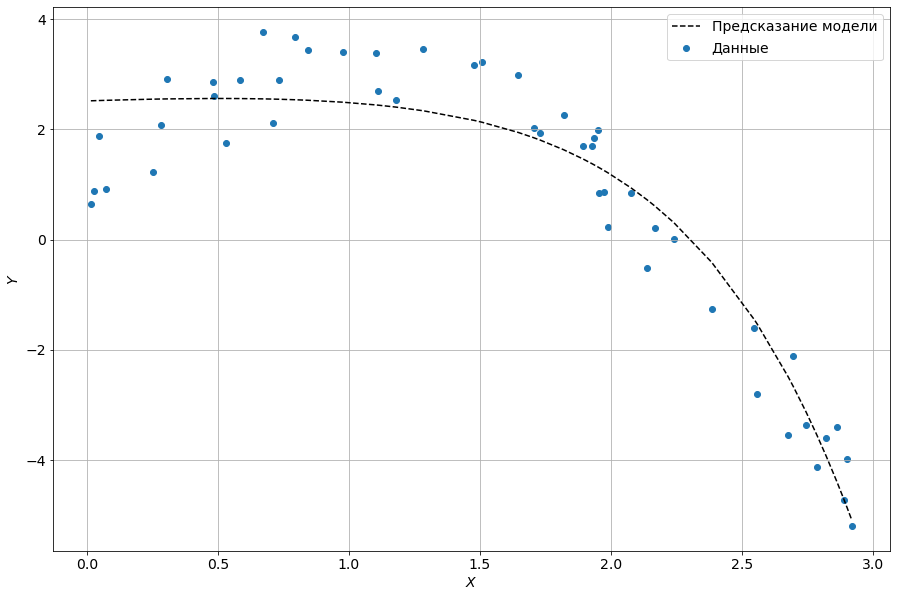

0.8987010800166921

In [327]:
# TODO - обучите модель и проверьте предсказания
# Cтало немного лучше
X_poly_scaled = minmax_feature_scale(X_poly)
y_true = y_data
start_W = np.zeros(DEGREE+1)
dJ = loss_function_deriv(X_poly_scaled, start_W, y_true)

new_W, loss_history = fit_model(
    lr=0.01,
    n_iter=2000,
    X=X_poly_scaled,
    y=y_true
)
y_pred = predict(X_poly_scaled, new_W)
plot_model(X_data, y_pred, y_data)
r2_score(y_true, y_pred)

In [328]:
# Стандартизация для линейной регрессии

W = [2, 20]

X = np.random.uniform(low=0, high=[40, 1], size=(15, 2))
X[:, 0] = X[:, 0].astype(int)
y_true = np.clip(X.dot(W)+np.random.randn(15)*3, 0, 100)

df = pd.DataFrame(X[:,:2], columns=['tasks_completed', 'class_attended_rate'])
df['grade'] = y_true

df

,tasks_completed,class_attended_rate,grade
0,12.0,0.979511,45.094491
1,7.0,0.017161,17.525138
2,30.0,0.806913,74.131335
3,13.0,0.464674,32.689224
4,25.0,0.048059,49.326066
5,37.0,0.886680,87.931461
6,10.0,0.015305,20.636990
7,37.0,0.501040,82.730722
8,21.0,0.683964,59.369909
9,24.0,0.943892,63.004159


In [329]:
y_pred = X.dot(W)
r2_score(y_true, y_pred)

0.9826541062331413

In [330]:
X_scaled = standardize_features_scale(X)

new_W, _ = fit_model(
    lr=0.01,
    n_iter=3000,
    X=X_scaled,
    y=y_true
)

y_pred = predict(X_scaled, new_W)
new_W, r2_score(y_true, y_pred)

Data shape: (15, 2)
Start weights: [0. 0. 0.]
Result weights: [57.29326909 21.53810823  5.95366071]


(array([57.29326909, 21.53810823,  5.95366071]), 0.9832343246501897)

# Выводы - задание


**Напишите выводы по итогам изучения материала. Вам может помочь следующий список вопросов, но лучше еще и добавить свои умозаключения!**

## Почему лучше использовать большое количество данных?


**Ответ:** Статистика основана на большом количестве данных, так как требуется оценить зависимость в целом (если взять мало точек, то можно увидеть лишь часть от общей зависимости (к примеру только лишь ее линейный участок), и не увидеть всю картину целиком)

## Что такое обучение модели и зачем это нужно?

**Ответ:** Обучение - это процесс изменения параметров (или другими словами весов) модели, так чтобы модель корректно описывала закономерность данных. Обучение необходимо чтобы спрогнозировать зависимую величину от независимых переменных (если рассмотреть на примере цены продукта в зависимости от его качества, то хотелось бы вводить любую величину качества и получать для данного качества соответствующую цену продукта)


## Что лучше визуальная оценка работы системы или численная? Почему?


**Ответ:** лучше всего применять совокупность этих двух оценок (визульное представление информации - наиболее понятно для человека, но нельзя исключать человеческий фактор при исследовании визуальной модели, поэтому ее и следует подкреплять численными оценками)


## В чём заключается задача оптимизации? Почему оптимизация нужна?

**Ответ:** задачей оптимизации является поиск экстремума по определенному критерию. Оптимизация необходима чтобы найти такие веса, при которых модель предсказывала данные как можно более точно. Как известно из теории оптимального управления, можно задаться такой функцией J, минимизуря которую, можно достичь оптимального результата. 


## Что за функция потерь и что она теряет? Может быть вообще эта функция только усложняет жизнь?

**Ответ:** функция потерь J должна отражать то, насколько хорошо модель предсказывает данные. Эта та функция, которую мы минимизируем для поиска оптимального значения весов. И как уже оговаривалось в вопросе 4, она необходима, чтобы посредством ее минимизации определить наилучшие веса, которые в свою очередь обеспечат наиболее точное предсказание данных. Характеризует потери при неправильном прогнозе данных. Простыми словами: функция потерь характеризует разницу между спрогнозированным и данным результатами. Поэтому и минимизируем.


## Что такое градиентный спуск и градиентный подъём? Существует ли градиентное плато?

**Ответ:** Градиентныйспуск - хотим получить минимум функции, поэтому уменьшаем значение функции, для этого от аргумента отнимаем производную данной функции в точке. Градиентный подъем - хотим получить максимум функции, для этого увеличиваем значение функции путем прибавление к аргументу производной функции. Градиентное плато существует и встречается, когда поверхность достаточно плоская, так что значения целевой функциине изменяются (застревание алгоритма).


## Какие эффекты могут произойти при работе с данными? Как их вовремя распознать? А нужно ли их распознавать, может и так сойдёт?

**Ответ:** Существуют такие эффекты: underfit -  сложность модели меньше, чем требуется (обычно распознается сразу, например, если данные описывают зависимость второго порядка, а модель первого порядка), overfit - модель слишком сложная, такая сложность не требуется. Один из простых методов для определения overfit является подход hold-out, при котором происходит разделение всей выборки на обучающую и тестовую. Это все необходимо делать, чтобы не получить очень большую ошибку между данными после обучения и исходными данными.

# Вопросы по данной теме:

## 1. Что такое зависимость в данных?

**Ответ:** зависимость данных - это когда при увеличении одних переменных (независимых), изменяется величина зависимой переменной. Тоесть между данными существует некоторая зависимость, которую можно выразить аналитически.


## 2.Как можно описать линейный характер распределения данных?

**Ответ:** Линейный характер распределения данных можно описать с помощью прямой y=b+kх или в терминах весов: y=w0+w1x

## 3. Что такое задача определения регрессии?

**Ответ:** Задача определения регрессии - определение аналитического описания (формулы) зависимости зависимой переменной y от независимых переменных x.

## 4. Что такое модель в машинном обучении?

**Ответ:** В машинном обучении модель - более общее понятие функции/алгоритма. Модель - то, с помощью чего описываем зависимость исходных данных. К примеру моделью линейной зависимости будет являться уравнение прямой.

## 5. Что такое обучение модели и зачем это нужно?

**Ответ:** Обучение модели - это процесс изменения параметров (иными словам весами модели) так, чтобы модель работала корректно. Это необходимо чтобы модель воспроизводила заданные данные с минимальной ошибкой.

## 6. Опишите процесс работы с данными и моделью, начиная от получения данных и заканчивая получением предсказания.

**Ответ:** Импорт данных -> Обработка данных -> выделение признаков (независимых переменных) и зависимых переменных -> нормализация (страндартизация) признаков -> выбирается модель обучения -> оценка с помощью метрик -> выбор метода оптимизации 
-> обучение модели -> сравнение метрик после обучения -> выводы о результатах обучения (если точность предсказанных данных не удовлетворяет, то следует пересмотреть метод поиска или шаг поиска)


## 7. Почему вес важен в машинном обучении?

**Ответ** - вес необходим чтобы выделять важность признаков относительно друг друга (к примеру, на оценку по предмету влияет средняя оценка за контрольную и средняя оценка за лабораторные работы. Если оценка за контрольные вносит больший вклад в итоговую оценку, то это можно выделить, придав данному признаку больший вес. И наоборот).


## 8. Какие метрики работают по правилу “меньше значение метрики - лучше модель работает”?

**Ответ:** такие метрики как MSE, RMSE, и MAE работают по принципу меньше-лучше.


## 9. В каком случае лучше применять метрику квадратичного отклонения?

**Ответ:** Квадратичное отклонение возводит значения ошибок в квадрат, поэтому сильнее реагирует на большие ошибки, так что его лучше применять в случае, когда большие ошибки нежелательны (но при этом следует помнить, что очень маленькие ошибки будут становиться еще меньше).


## 10. В чём заключается задача оптимизации?

**Ответ:** Задача оптимизации заключается в поиске экстремума (оптимума) по определенному критерию.


## 11. Что такое “определение градиента”

**Ответ:** определение градиента - это определение направление наискорейшего возрастания (или убывания, зависит от знака) некоторого параметра.


## 12. Опишите что происходит при градиентном расхождении?

**Ответ:** при градиентном расхождении можно наблюдать такое явление: хоти достичь минимума и пытаемся двигаться в его направлении, уменьшая величину функции, но все происходит наоборот: величина функции все увеличивается.


## 13. Опишите эффект underfit? Приведите пример

**Ответ:** underfir - сложность модели меньше, чем требуется для описания данных (например, пытаемся описать зависимость второго порядка между данными моделью первого порядка).


## 14. В чём особенности метрики R2?

**Ответ:** метрика R2 имеет верхний предел, который равен 1, и который достигается, если отклонения предсказаний всегда равны нулю. При этом нижний предел не ограничивается.


## 15. Приведите пример эффекта overfit?

**Ответ:** overfit - сложность модели больше, чем нужно. К примеру для описания зависимости между данными второго порядка, мы берем модель 25 порядка. 